### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('energy.csv')

In [3]:
df.head(20)

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
5,Industrial,31207,47,28,22.82,Weekday,5026.23
6,Residential,39227,18,44,23.36,Weekend,4404.56
7,Residential,7814,21,19,27.27,Weekday,2394.37
8,Industrial,20482,24,16,23.00,Weekend,3969.09
9,Industrial,21030,90,35,12.96,Weekday,5136.69


In [4]:
df.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [5]:
df.describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [7]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98    False
99    False
Length: 100, dtype: bool

In [8]:
df.columns

Index(['Building Type', 'Square Footage', 'Number of Occupants',
       'Appliances Used', 'Average Temperature', 'Day of Week',
       'Energy Consumption'],
      dtype='object')

In [9]:
list1=['Building_Type',
 'Square_Footage',
 'Number_of_Occupants',
 'Appliances_Used',
 'Average_Temperature',
 'Day_of_Week',
 'Energy_Consumption']

In [10]:
df.columns=list1

In [11]:
df['Square_Footage'].nunique()

99

In [12]:
df

,Building_Type,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


<Axes: xlabel='Square_Footage', ylabel='Count'>

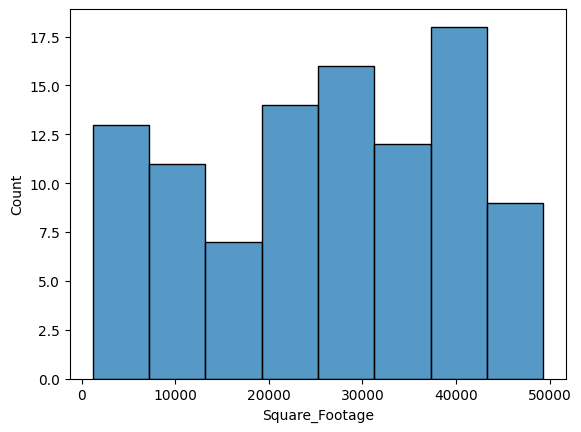

In [13]:
sns.histplot(df["Square_Footage"])

<Axes: xlabel='Number_of_Occupants', ylabel='Count'>

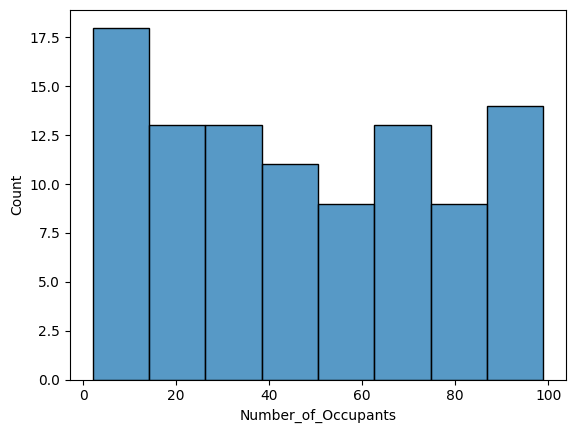

In [14]:
sns.histplot(df["Number_of_Occupants"])

<Axes: xlabel='Appliances_Used', ylabel='Count'>

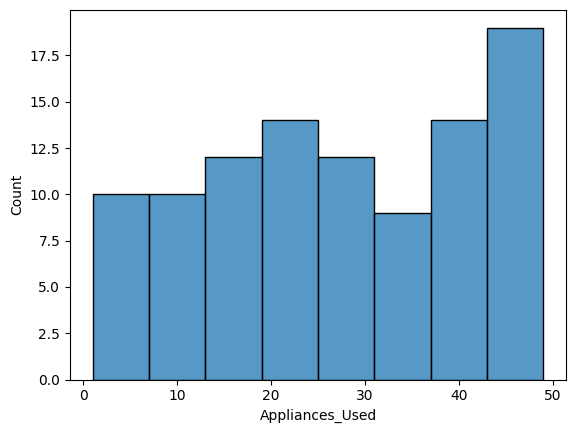

In [15]:
sns.histplot(df["Appliances_Used"])

<Axes: xlabel='Average_Temperature', ylabel='Count'>

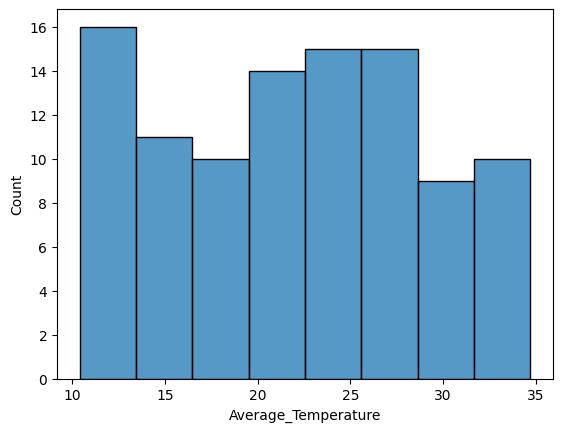

In [16]:
sns.histplot(df["Average_Temperature"])

<Axes: xlabel='Day_of_Week', ylabel='Count'>

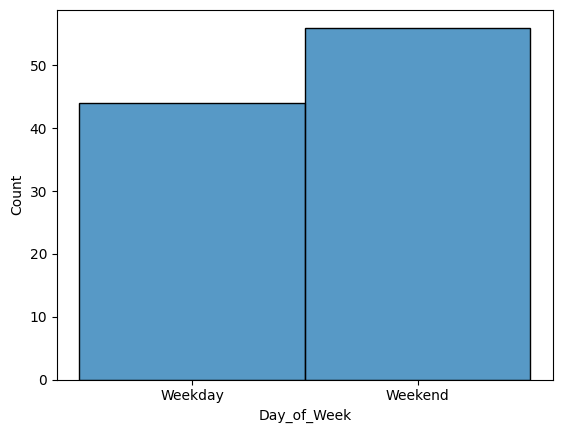

In [17]:
sns.histplot(df["Day_of_Week"])

<Axes: xlabel='Number_of_Occupants', ylabel='Density'>

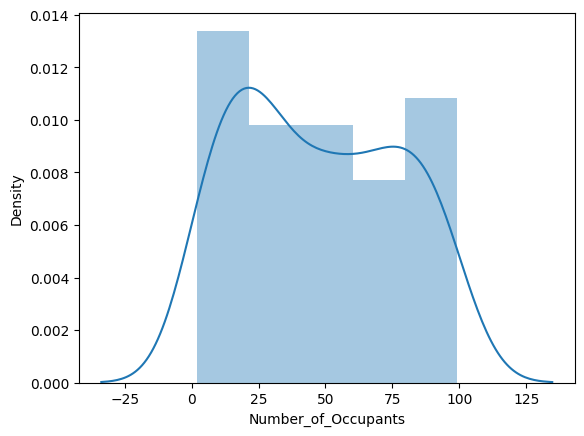

In [18]:
sns.distplot(df["Number_of_Occupants"])

<Axes: xlabel='Square_Footage', ylabel='Density'>

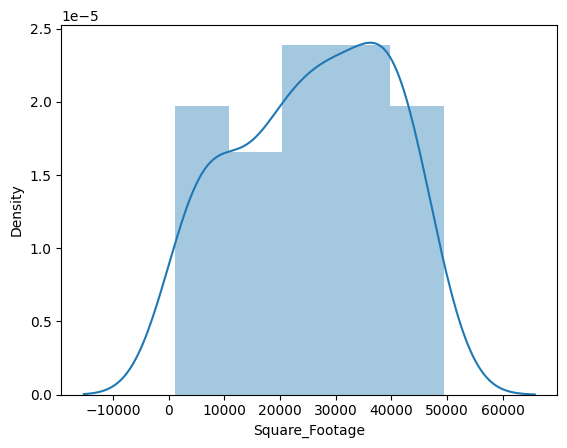

In [19]:
sns.distplot(df["Square_Footage"])

<Axes: xlabel='Appliances_Used', ylabel='Density'>

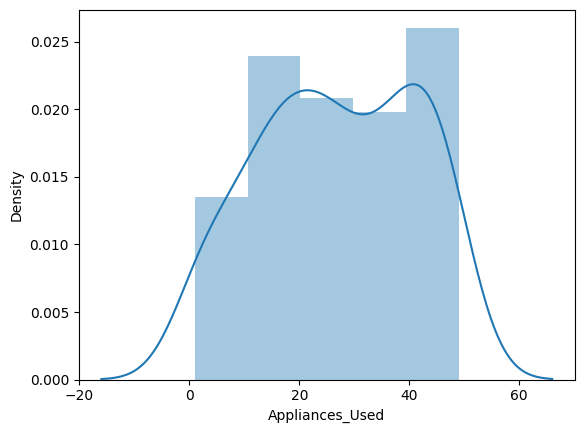

In [20]:
sns.distplot(df["Appliances_Used"])

<Axes: xlabel='Average_Temperature', ylabel='Density'>

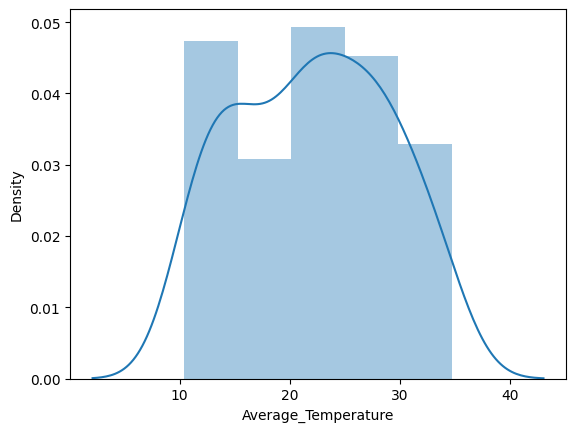

In [21]:
sns.distplot(df["Average_Temperature"])

<Axes: xlabel='Appliances_Used', ylabel='Density'>

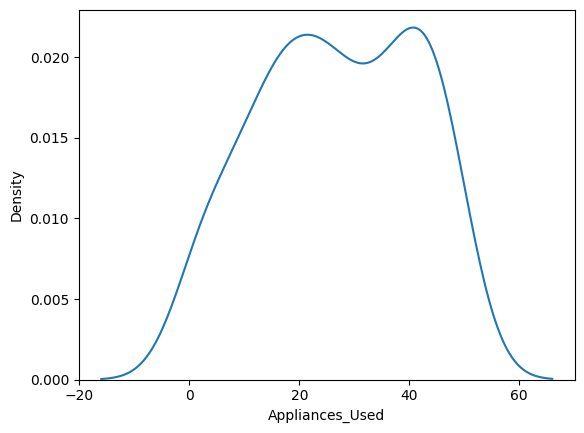

In [22]:
sns.kdeplot(df['Appliances_Used'])

<Axes: xlabel='Average_Temperature', ylabel='Density'>

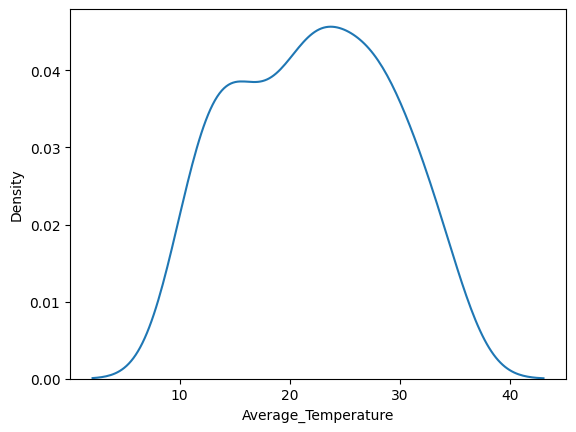

In [23]:
sns.kdeplot(df["Average_Temperature"])

<Axes: xlabel='Number_of_Occupants', ylabel='Density'>

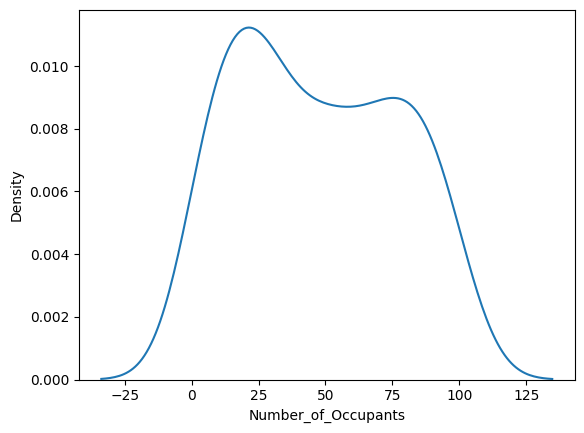

In [24]:
sns.kdeplot(df["Number_of_Occupants"])

<Axes: xlabel='Square_Footage', ylabel='Density'>

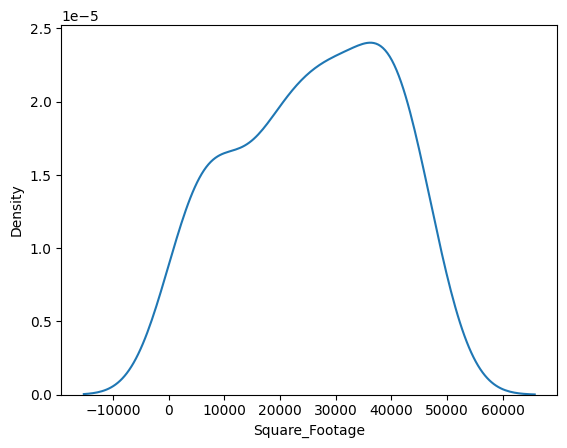

In [25]:
sns.kdeplot(df["Square_Footage"])

<Axes: xlabel='count', ylabel='Day_of_Week'>

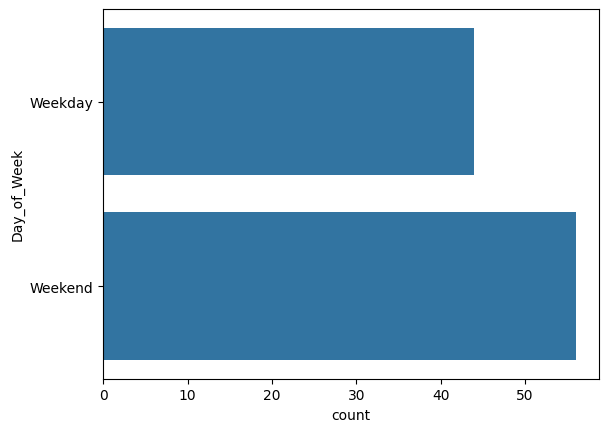

In [26]:
sns.countplot(df['Day_of_Week'])

<Axes: xlabel='count', ylabel='Building_Type'>

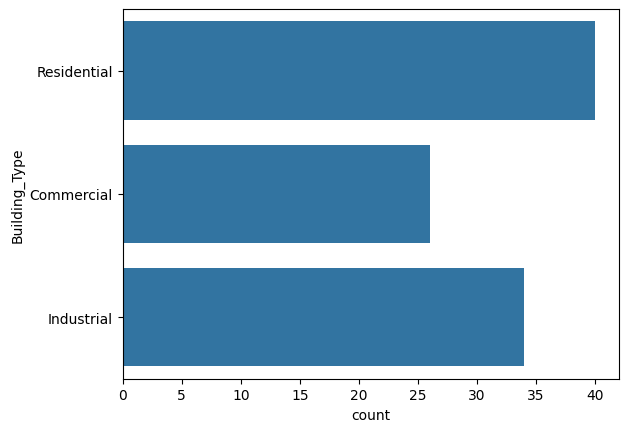

In [27]:
sns.countplot(df['Building_Type'])

<Axes: ylabel='Square_Footage'>

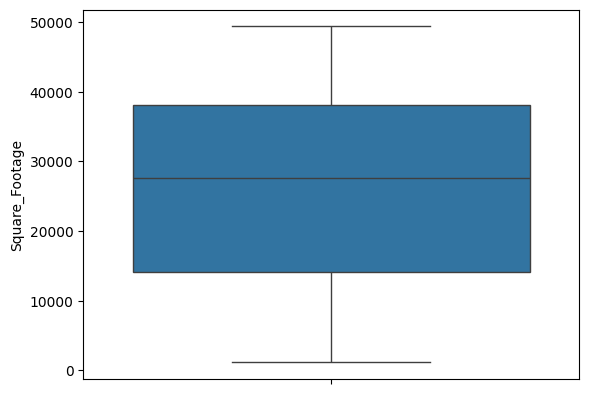

In [28]:
sns.boxplot(df['Square_Footage'])



<Axes: ylabel='Number_of_Occupants'>

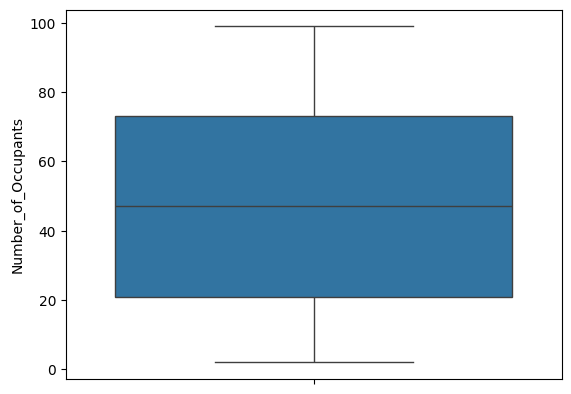

In [29]:
sns.boxplot(df['Number_of_Occupants'])

<Axes: ylabel='Appliances_Used'>

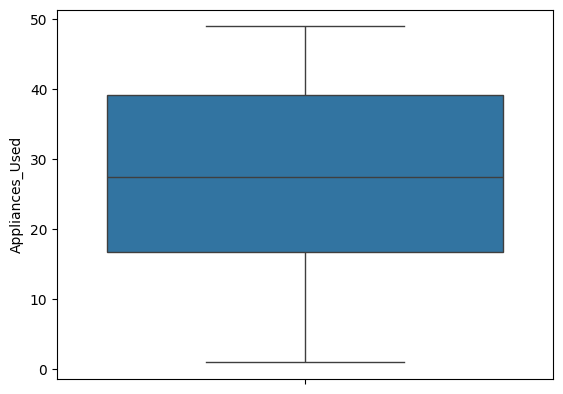

In [30]:

sns.boxplot(df['Appliances_Used'])

<Axes: ylabel='Average_Temperature'>

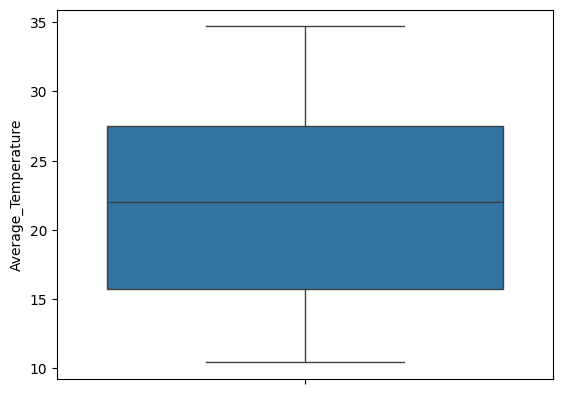

In [31]:

sns.boxplot(df['Average_Temperature'])

## Feature Engineering

### Feature Selection

##### Linearity

In [32]:
main_df=df.copy()

In [33]:
main_df

,Building_Type,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59
...,...,...,...,...,...,...,...
95,Commercial,1161,81,11,15.45,Weekend,3010.81
96,Residential,37943,50,23,21.73,Weekend,4248.49
97,Commercial,1558,27,29,16.86,Weekend,2843.60
98,Industrial,2145,56,12,11.77,Weekend,3348.39


In [34]:
main_df.columns

Index(['Building_Type', 'Square_Footage', 'Number_of_Occupants',
       'Appliances_Used', 'Average_Temperature', 'Day_of_Week',
       'Energy_Consumption'],
      dtype='object')

In [35]:
main_df['Day_of_Week'].unique()

array(['Weekday', 'Weekend'], dtype=object)

In [36]:
main_df['Day_of_Week'].replace({'Weekday':0, 'Weekend':1}, inplace=True)

In [37]:
df = pd.get_dummies(main_df, columns=['Building_Type'], dtype=int)
df

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
0,24563,15,4,28.52,0,2865.57,0,0,1
1,27583,56,23,23.07,1,4283.80,1,0,0
2,45313,4,44,33.56,0,5067.83,1,0,0
3,41625,84,17,27.39,1,4624.30,0,0,1
4,36720,58,47,17.08,0,4820.59,0,0,1
...,...,...,...,...,...,...,...,...,...
95,1161,81,11,15.45,1,3010.81,1,0,0
96,37943,50,23,21.73,1,4248.49,0,0,1
97,1558,27,29,16.86,1,2843.60,1,0,0
98,2145,56,12,11.77,1,3348.39,0,1,0


In [38]:
df

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
0,24563,15,4,28.52,0,2865.57,0,0,1
1,27583,56,23,23.07,1,4283.80,1,0,0
2,45313,4,44,33.56,0,5067.83,1,0,0
3,41625,84,17,27.39,1,4624.30,0,0,1
4,36720,58,47,17.08,0,4820.59,0,0,1
...,...,...,...,...,...,...,...,...,...
95,1161,81,11,15.45,1,3010.81,1,0,0
96,37943,50,23,21.73,1,4248.49,0,0,1
97,1558,27,29,16.86,1,2843.60,1,0,0
98,2145,56,12,11.77,1,3348.39,0,1,0


In [39]:
df.cov()

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
Square_Footage,1.879936e+08,-32990.718788,-28488.578182,2920.369762,-1384.560808,8.265118e+06,1027.899798,-803.457374,-224.442424
Number_of_Occupants,-3.299072e+04,894.340505,14.613030,-13.235716,0.223434,7.683408e+03,0.040606,0.022020,-0.062626
Appliances_Used,-2.848858e+04,14.613030,202.716263,-13.511213,-0.518384,2.090789e+03,0.341212,-0.949293,0.608081
Average_Temperature,2.920370e+03,-13.235716,-13.511213,48.413087,-0.496412,-4.618870e+02,-0.236321,0.130079,0.106242
Day_of_Week,-1.384561e+03,0.223434,-0.518384,-0.496412,0.248889,-7.035520e+01,-0.005657,0.019798,-0.014141
Energy_Consumption,8.265118e+06,7683.407567,2090.788635,-461.887024,-70.355200,6.931559e+05,67.968325,121.440685,-189.409010
Building_Type_Commercial,1.027900e+03,0.040606,0.341212,-0.236321,-0.005657,6.796833e+01,0.194343,-0.089293,-0.105051
Building_Type_Industrial,-8.034574e+02,0.022020,-0.949293,0.130079,0.019798,1.214407e+02,-0.089293,0.226667,-0.137374
Building_Type_Residential,-2.244424e+02,-0.062626,0.608081,0.106242,-0.014141,-1.894090e+02,-0.105051,-0.137374,0.242424


In [40]:
df.std()

Square_Footage               13711.075264
Number_of_Occupants             29.905526
Appliances_Used                 14.237846
Average_Temperature              6.957951
Day_of_Week                      0.498888
Energy_Consumption             832.559850
Building_Type_Commercial         0.440844
Building_Type_Industrial         0.476095
Building_Type_Residential        0.492366
dtype: float64

In [41]:
df.corr()

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
Square_Footage,1.000000,-0.080458,-0.145933,0.030612,-0.202413,0.724039,0.170057,-0.123083,-0.033246
Number_of_Occupants,-0.080458,1.000000,0.034320,-0.063608,0.014976,0.308594,0.003080,0.001547,-0.004253
Appliances_Used,-0.145933,0.034320,1.000000,-0.136386,-0.072980,0.176380,0.054362,-0.140043,0.086742
Average_Temperature,0.030612,-0.063608,-0.136386,1.000000,-0.143007,-0.079733,-0.077044,0.039267,0.031012
Day_of_Week,-0.202413,0.014976,-0.072980,-0.143007,1.000000,-0.169386,-0.025720,0.083354,-0.057571
Energy_Consumption,0.724039,0.308594,0.176380,-0.079733,-0.169386,1.000000,0.185185,0.306376,-0.462059
Building_Type_Commercial,0.170057,0.003080,0.054362,-0.077044,-0.025720,0.185185,1.000000,-0.425440,-0.483978
Building_Type_Industrial,-0.123083,0.001547,-0.140043,0.039267,0.083354,0.306376,-0.425440,1.000000,-0.586033
Building_Type_Residential,-0.033246,-0.004253,0.086742,0.031012,-0.057571,-0.462059,-0.483978,-0.586033,1.000000


In [42]:
df.var()

Square_Footage               1.879936e+08
Number_of_Occupants          8.943405e+02
Appliances_Used              2.027163e+02
Average_Temperature          4.841309e+01
Day_of_Week                  2.488889e-01
Energy_Consumption           6.931559e+05
Building_Type_Commercial     1.943434e-01
Building_Type_Industrial     2.266667e-01
Building_Type_Residential    2.424242e-01
dtype: float64

<Axes: >

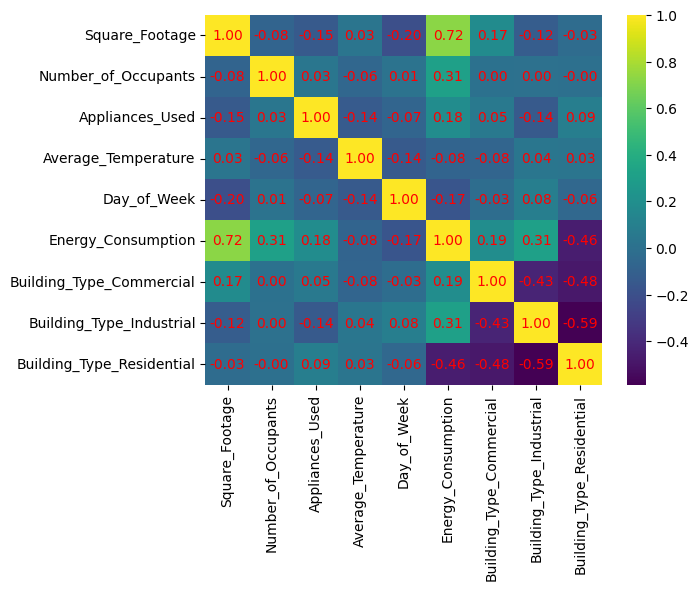

In [43]:
sns.heatmap(df.corr(), annot=True,fmt=".2f",cmap='viridis',                # or 'coolwarm', 'RdYlBu', etc.
    annot_kws={"color": "red"}  # annotation text color
           )

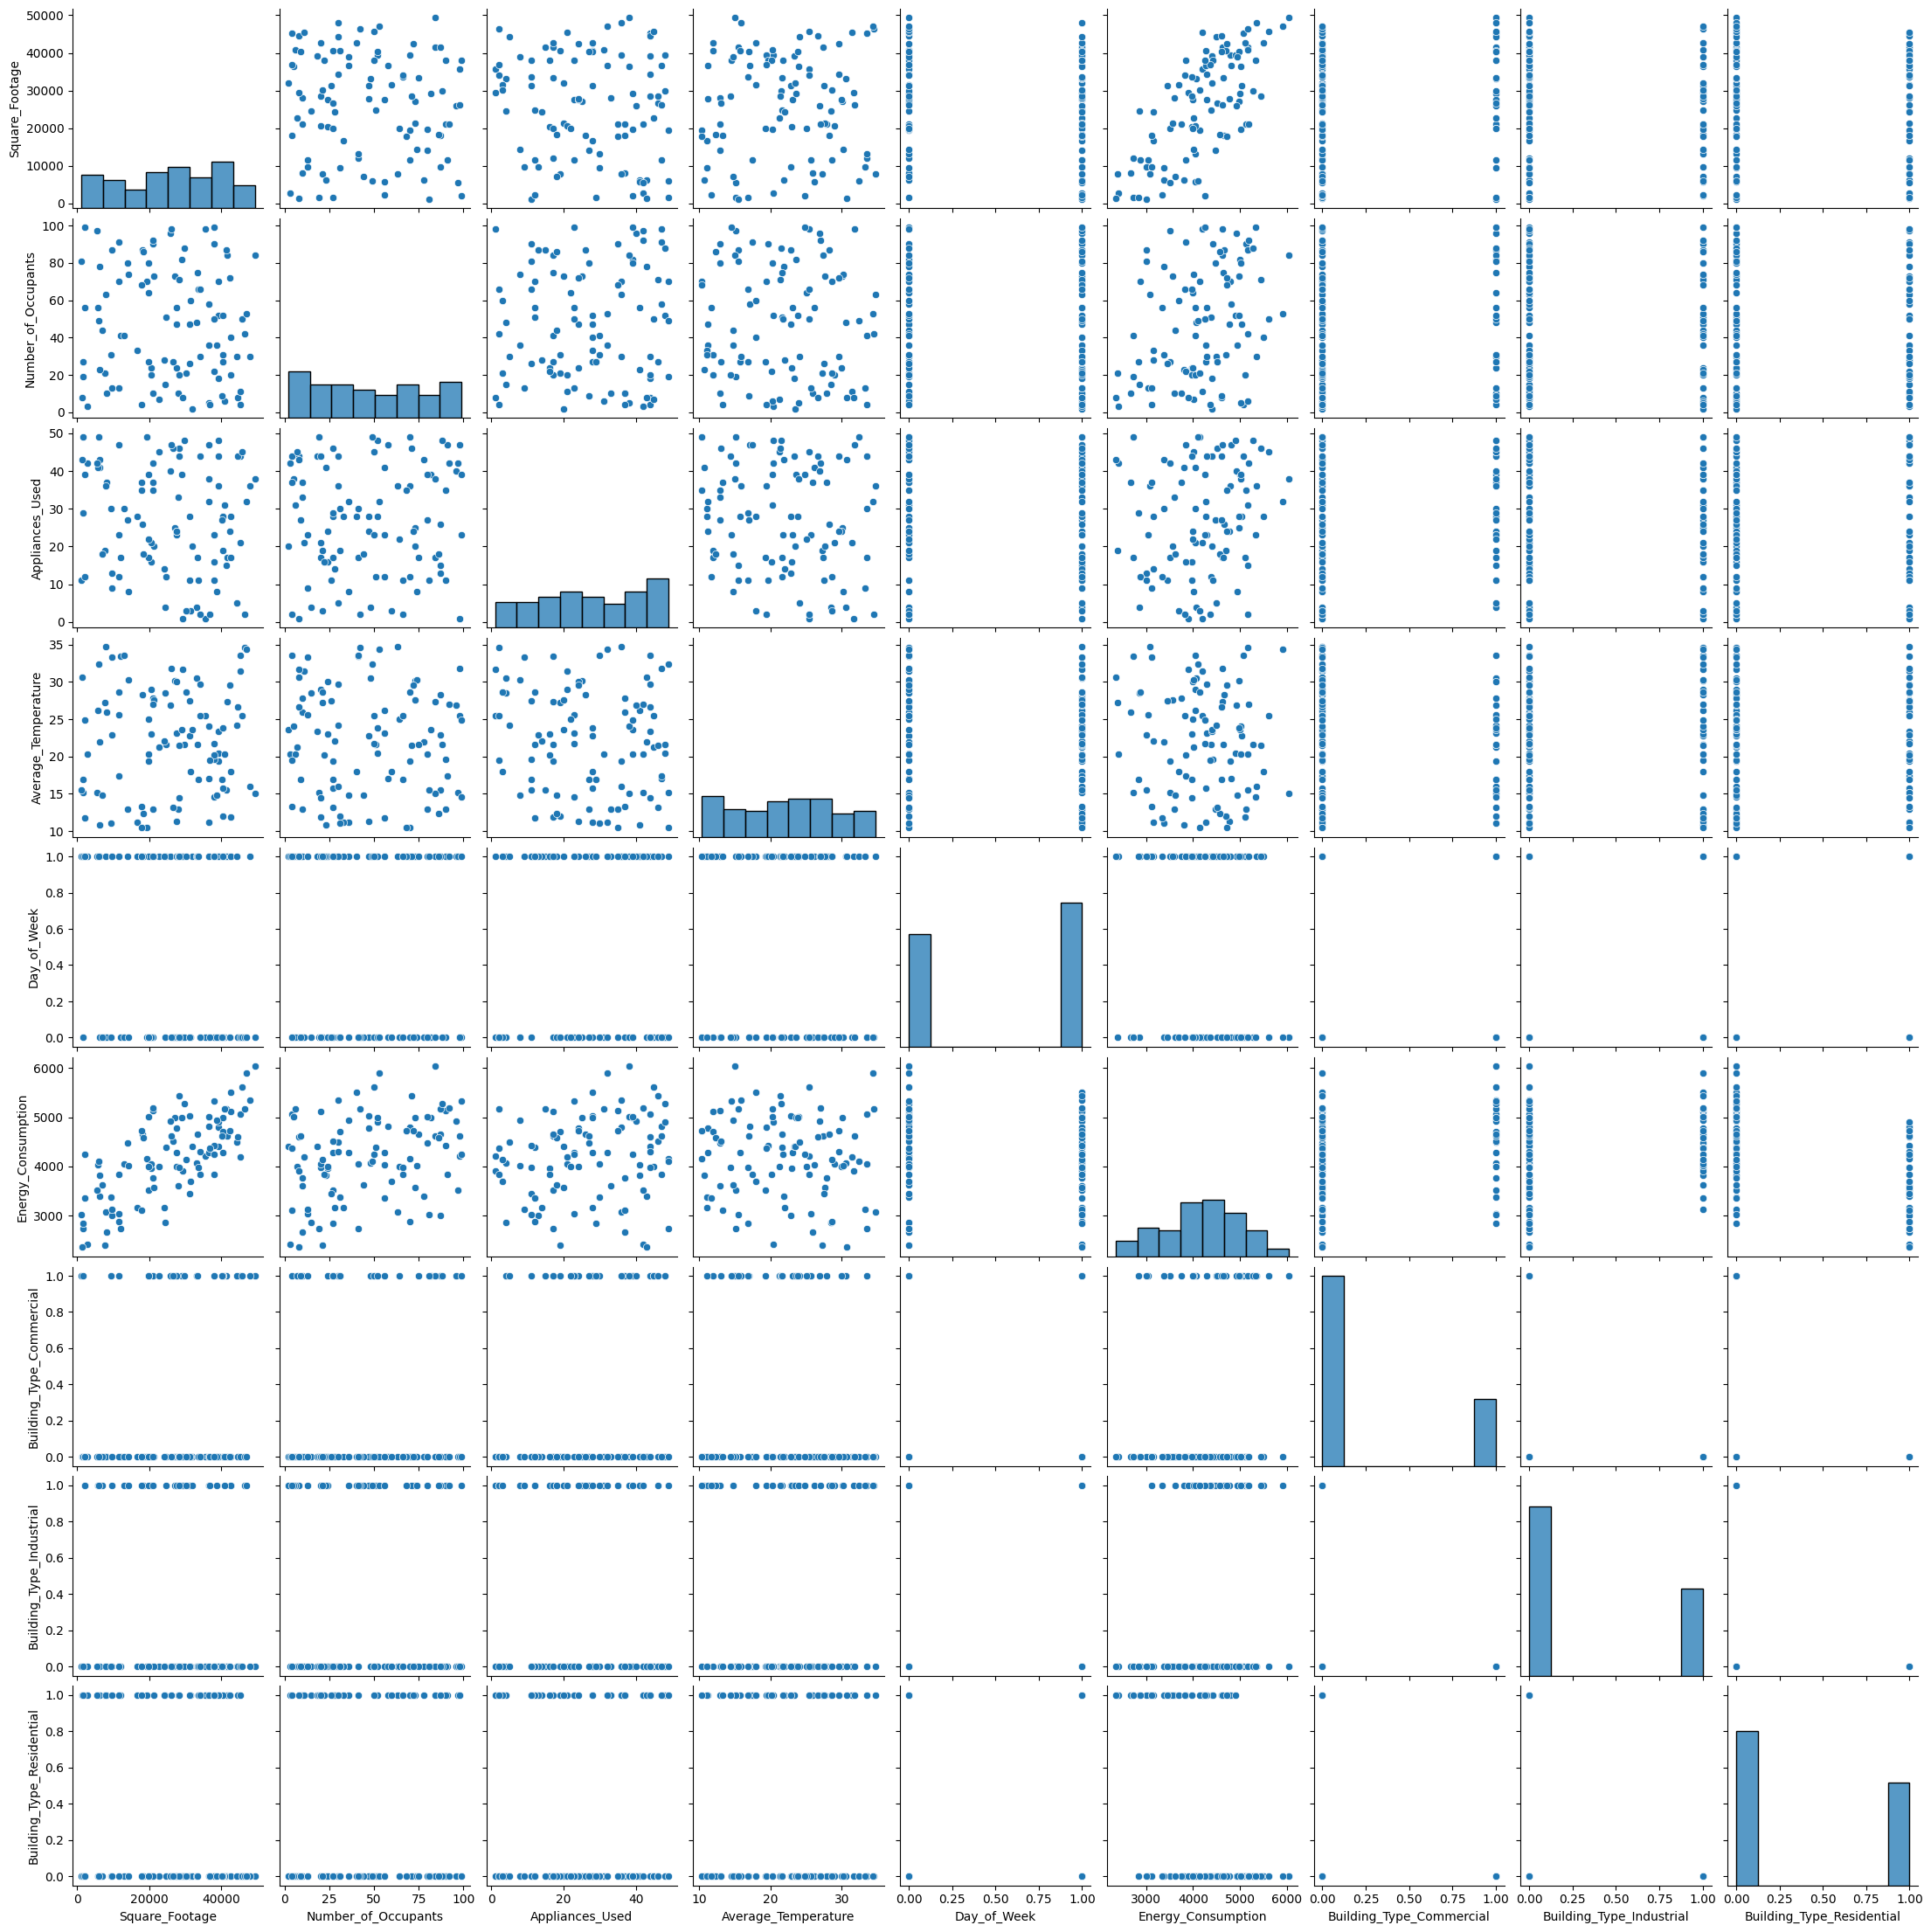

In [44]:
sns.pairplot(df)

In [45]:
df

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
0,24563,15,4,28.52,0,2865.57,0,0,1
1,27583,56,23,23.07,1,4283.80,1,0,0
2,45313,4,44,33.56,0,5067.83,1,0,0
3,41625,84,17,27.39,1,4624.30,0,0,1
4,36720,58,47,17.08,0,4820.59,0,0,1
...,...,...,...,...,...,...,...,...,...
95,1161,81,11,15.45,1,3010.81,1,0,0
96,37943,50,23,21.73,1,4248.49,0,0,1
97,1558,27,29,16.86,1,2843.60,1,0,0
98,2145,56,12,11.77,1,3348.39,0,1,0


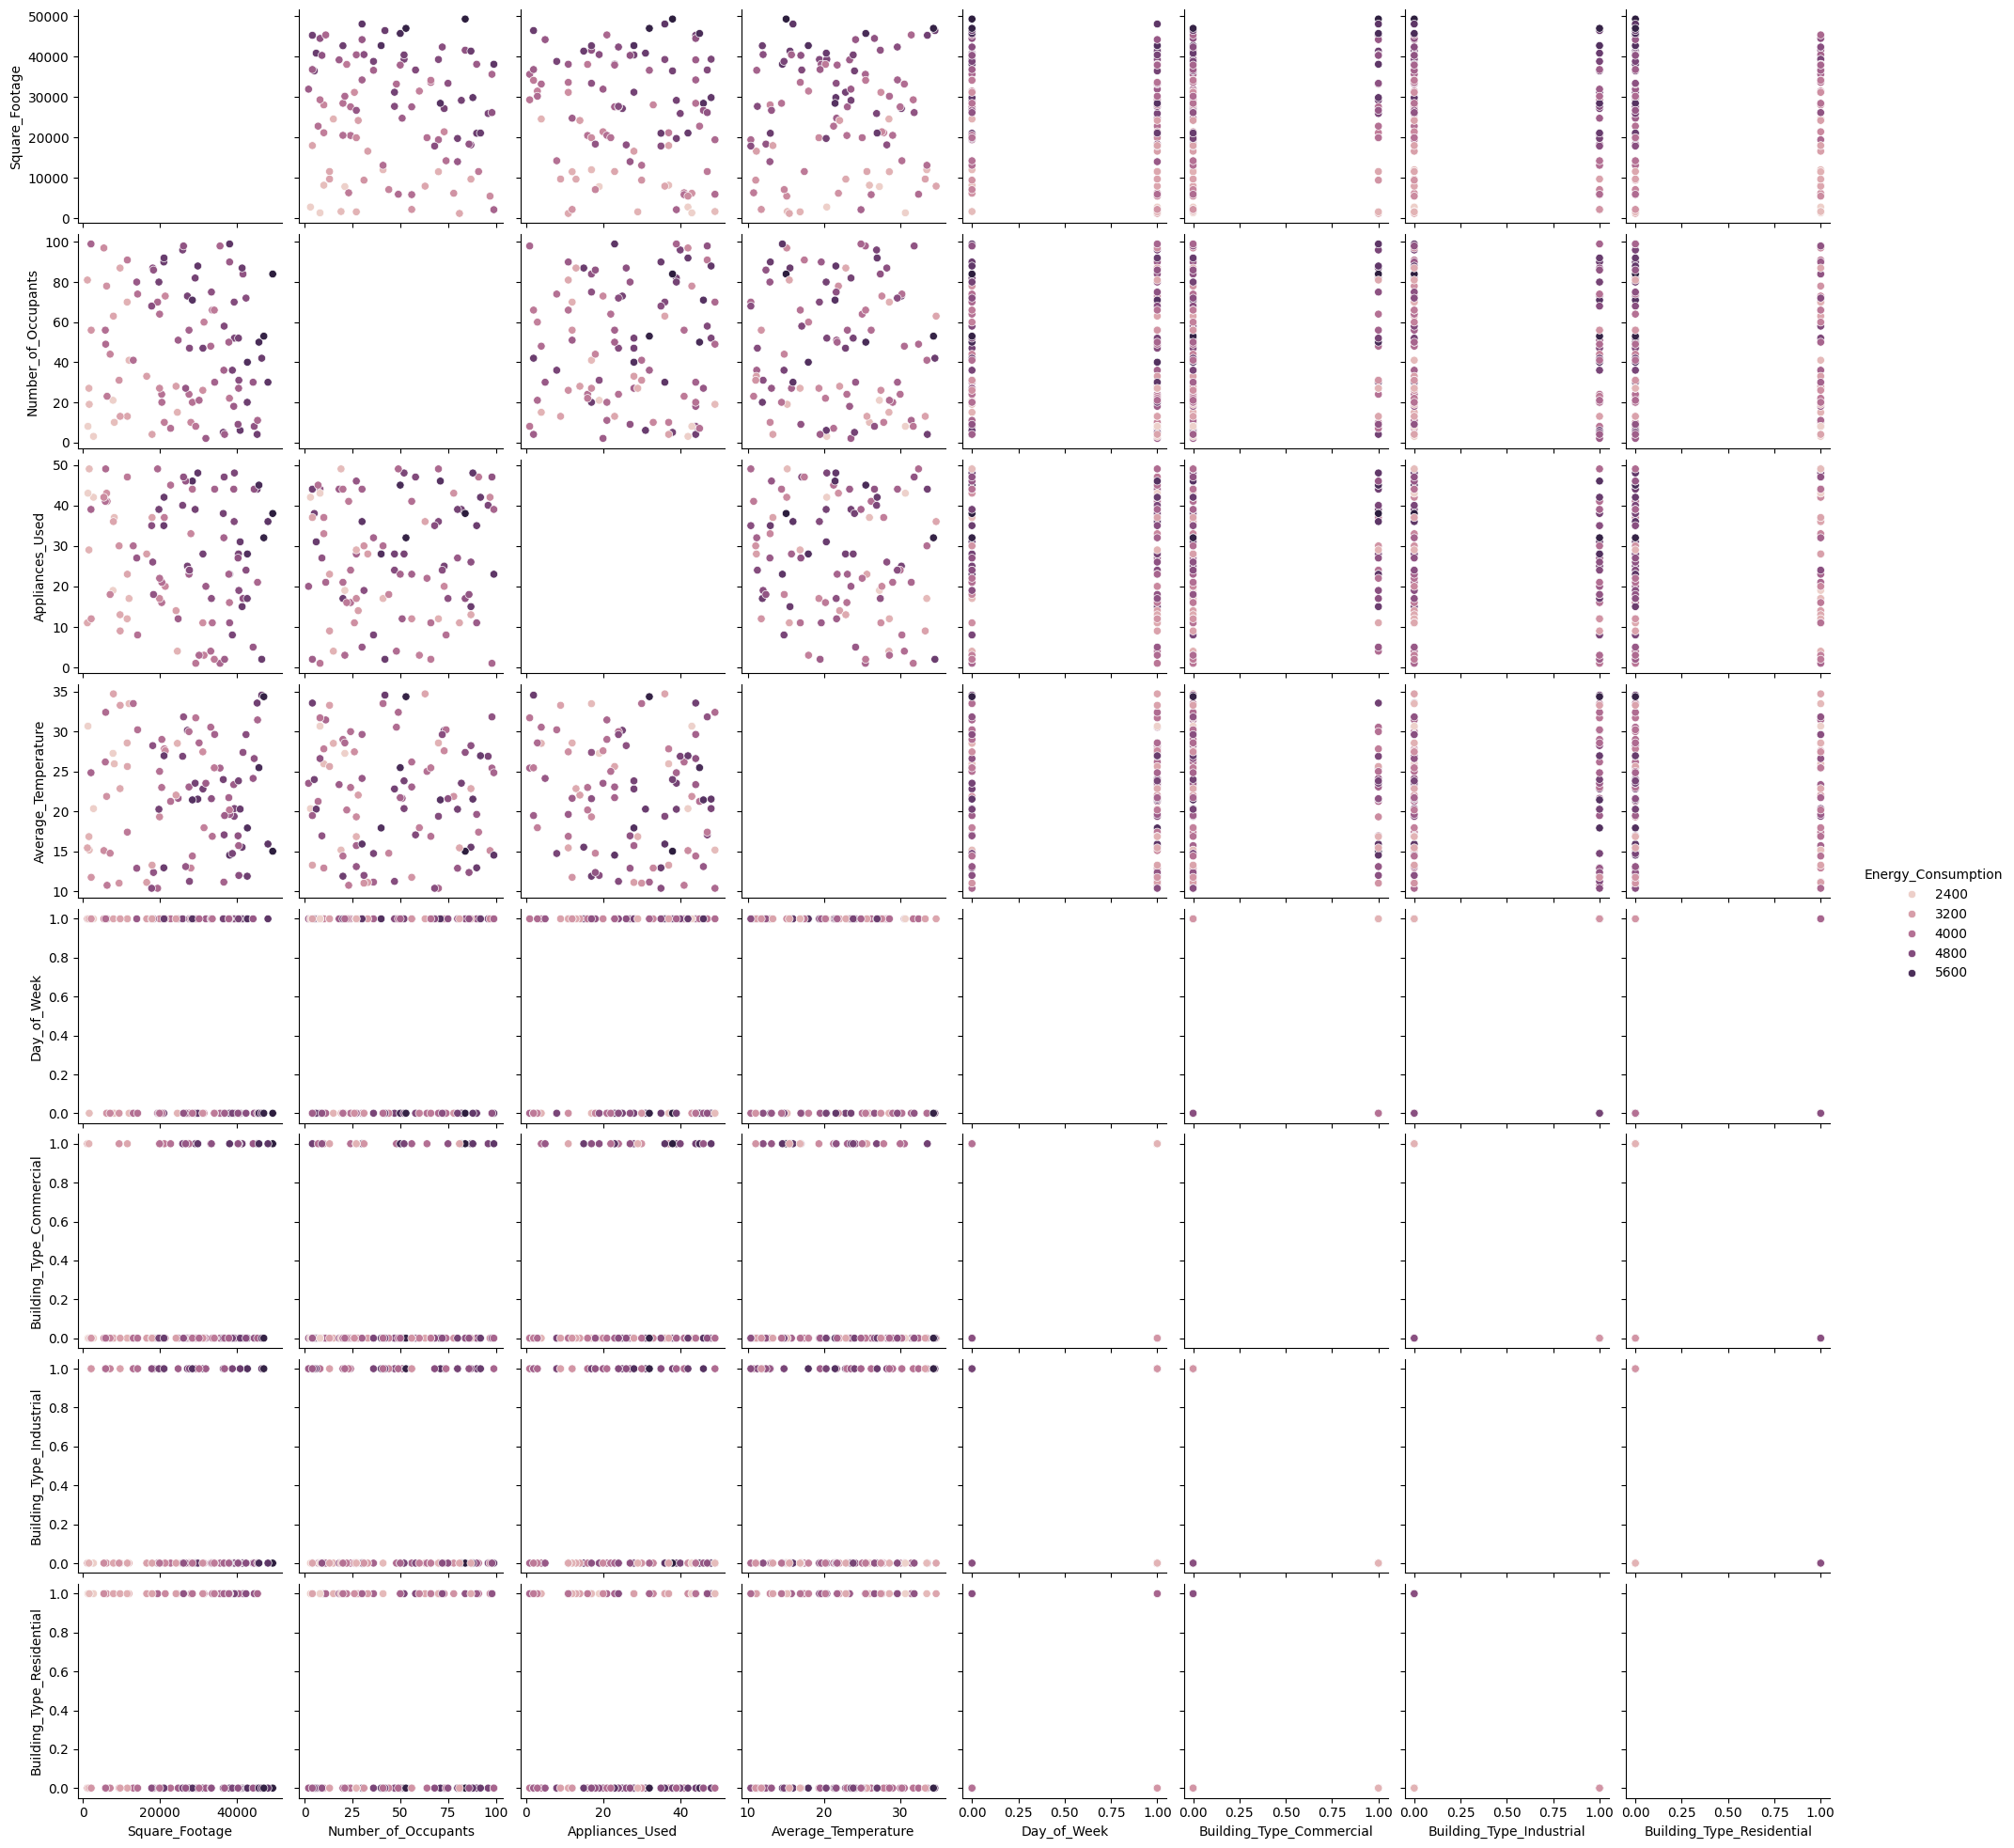

In [46]:
sns.pairplot(df, hue = "Energy_Consumption")

In [47]:
import plotly.express as px

fig = px.scatter_3d(df, x='Square_Footage', y='Number_of_Occupants', z='Appliances_Used',
              color='Energy_Consumption')
fig.show()

In [48]:
df.columns

Index(['Square_Footage', 'Number_of_Occupants', 'Appliances_Used',
       'Average_Temperature', 'Day_of_Week', 'Energy_Consumption',
       'Building_Type_Commercial', 'Building_Type_Industrial',
       'Building_Type_Residential'],
      dtype='object')

### No Multicolinearity

In [49]:
for i in range(1, df.shape[1]):
    vif = variance_inflation_factor(df.values, i)
    print(f'VIF of {df.columns[i]} is : {vif}')

VIF of Number_of_Occupants is : 487740148.2130295
VIF of Appliances_Used is : 442213223.29884315
VIF of Average_Temperature is : 6600909.4525117595
VIF of Day_of_Week is : 3394112.8594880598
VIF of Energy_Consumption is : 3780258503.5010757
VIF of Building_Type_Commercial is : 6019241670.3417015
VIF of Building_Type_Industrial is : 12179181935.592512
VIF of Building_Type_Residential is : 5294039417.733783


In [50]:
x = df.drop('Energy_Consumption', axis = 1)  # 2D
y = df['Energy_Consumption']   # 1D

In [51]:
x.head()

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
0,24563,15,4,28.52,0,0,0,1
1,27583,56,23,23.07,1,1,0,0
2,45313,4,44,33.56,0,1,0,0
3,41625,84,17,27.39,1,0,0,1
4,36720,58,47,17.08,0,0,0,1


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=2)
x_train

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
35,22797,7,45,21.26,1,1,0,0
11,6279,23,41,10.77,1,0,1,0
84,31487,60,3,17.97,0,0,0,1
44,36642,36,32,11.17,1,0,0,1
73,26715,27,46,13.11,0,1,0,0
...,...,...,...,...,...,...,...,...
43,38141,90,11,19.64,1,0,0,1
22,42729,20,17,11.91,1,0,1,0
72,38141,99,23,14.54,0,1,0,0
15,8157,10,37,25.96,0,0,0,1


In [53]:
x_test.shape

(20, 8)

In [54]:
x_train.shape

(80, 8)

In [55]:
linear_reg = LinearRegression()
linear_reg

LinearRegression()

In [56]:
linear_reg.fit(x_train, y_train) 

LinearRegression()

In [57]:
linear_reg.n_features_in_

8

In [58]:
linear_reg.feature_names_in_

array(['Square_Footage', 'Number_of_Occupants', 'Appliances_Used',
       'Average_Temperature', 'Day_of_Week', 'Building_Type_Commercial',
       'Building_Type_Industrial', 'Building_Type_Residential'],
      dtype=object)

In [59]:
linear_reg.coef_

array([ 4.99999214e-02,  9.99991138e+00,  1.99998154e+01, -5.00020481e+00,
       -5.00058858e+01,  1.25937440e-03,  4.99997380e+02, -4.99998639e+02])

In [60]:
linear_reg.intercept_

np.float64(2050.01793920589)

In [61]:
x_test.head()

,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
83,47042,53,32,34.36,0,0,1,0
30,27708,47,24,11.26,1,0,1,0
56,9655,87,13,22.86,1,0,0,1
24,42767,40,28,17.94,1,0,1,0
16,27165,73,25,30.15,0,0,1,0


In [62]:
y_test.head()

83    5900.32
30    4779.08
56    2998.47
24    5508.64
16    4987.52
Name: Energy_Consumption, dtype: float64

### Model Evaluation

In [63]:
y_pred = linear_reg.predict(x_test)  # 2D
y_pred

array([5900.29398039, 4779.09635382, 2998.44786352, 5508.64368407,
       4987.4959246 , 4656.28971327, 5067.85028725, 4491.95130875,
       3999.15433133, 4991.64761724, 4722.59908884, 3830.70518225,
       4618.74336423, 4474.99361782, 2865.55946049, 4921.73987437,
       4624.29395042, 3758.94823366, 5161.95049699, 4612.05677307])

In [64]:
residuals = y_test - y_pred
residuals

83    0.026020
30   -0.016354
56    0.022136
24   -0.003684
16    0.024075
23    0.000287
2    -0.020287
27    0.018691
28   -0.014331
13   -0.007617
99   -0.009089
92   -0.025182
76    0.026636
14   -0.013618
0     0.010540
21   -0.009874
3     0.006050
29    0.001766
61   -0.010497
79   -0.016773
Name: Energy_Consumption, dtype: float64

### Evaluation on Testing Data

In [65]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error :', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error :', mae)

r_square = r2_score(y_test, y_pred)
print('R-Squared Value :', r_square)

adj_r2 = 1 - (((1- r_square)*(y_test.shape[0] - 1))/ (y_test.shape[0] - x_test.shape[1] - 1))
print('Adj-R-Squared Value :', adj_r2)

Mean Squared Error : 0.0002651800947905117
Root Mean Squared Error : 0.016284351224120405
Mean Absolute Error : 0.014175385772568916
R-Squared Value : 0.9999999995051421
Adj-R-Squared Value : 0.9999999991452454


In [66]:
r_square = linear_reg.score(x_test, y_test)
print('R-Squared Value :', r_square)

R-Squared Value : 0.9999999995051421


### Evaluation on Training Data

In [67]:
y_pred_train = linear_reg.predict(x_train)
y_pred_train

array([4003.54823994, 3810.0971275 , 3694.50727354, 4276.24914926,
       4510.20352992, 5026.24885862, 4205.35241991, 4939.05457682,
       4009.79997724, 3562.44591961, 5445.98801944, 4283.79721139,
       3388.2994831 , 3163.45173838, 4193.3544382 , 3112.65209476,
       4404.54582963, 4001.95277617, 3977.64943114, 5162.34639687,
       4400.49823276, 3072.64345406, 3127.79904257, 3629.6045142 ,
       3010.80084825, 6042.54778239, 4068.94945349, 4275.64944914,
       2351.94838387, 5014.79419179, 5136.69657505, 4248.49730474,
       4039.99108089, 2872.04824038, 4983.44547579, 3840.19219864,
       5346.0469646 , 3506.64354256, 2843.6019914 , 3969.09803234,
       4721.39341183, 4137.64879029, 3451.60689069, 3348.39967603,
       5016.09532433, 3980.90421333, 3160.25192961, 5275.89577788,
       4575.59451116, 5179.48634604, 4103.3889457 , 5172.75169387,
       3039.50175785, 3844.00138146, 4374.35770826, 4707.05729774,
       3509.65225682, 2405.35101023, 4294.59975644, 4897.64856

In [68]:
mse = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error :', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error :', rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error :', mae)

r_square = r2_score(y_train, y_pred_train)
print('R-Squared Value :', r_square)

adj_r2 = 1 - (((1- r_square)*(y_train.shape[0] - 1))/ (y_train.shape[0] - x_train.shape[1] - 1))
print('Adj-R-Squared Value :', adj_r2)

Mean Squared Error : 0.00016427765876398347
Root Mean Squared Error : 0.012817084643708314
Mean Absolute Error : 0.010739085701140993
R-Squared Value : 0.9999999997595036
Adj-R-Squared Value : 0.9999999997324054


In [69]:
column_names=x_train.columns
column_names

Index(['Square_Footage', 'Number_of_Occupants', 'Appliances_Used',
       'Average_Temperature', 'Day_of_Week', 'Building_Type_Commercial',
       'Building_Type_Industrial', 'Building_Type_Residential'],
      dtype='object')

In [70]:
project_data = {'Day_of_Week': {'Weekday': 0, 'Weekend':1},
                'columns': list(column_names)}
print(project_data)

{'Day_of_Week': {'Weekday': 0, 'Weekend': 1}, 'columns': ['Square_Footage', 'Number_of_Occupants', 'Appliances_Used', 'Average_Temperature', 'Day_of_Week', 'Building_Type_Commercial', 'Building_Type_Industrial', 'Building_Type_Residential']}


In [71]:
import pickle 

with open('Linear_Model.pkl', 'wb') as f:
    pickle.dump(linear_reg, f)

In [72]:

import json

with open('project_data.json', 'w') as f:
    json.dump(project_data, f)

In [73]:
df.columns

Index(['Square_Footage', 'Number_of_Occupants', 'Appliances_Used',
       'Average_Temperature', 'Day_of_Week', 'Energy_Consumption',
       'Building_Type_Commercial', 'Building_Type_Industrial',
       'Building_Type_Residential'],
      dtype='object')

In [74]:
df


,Square_Footage,Number_of_Occupants,Appliances_Used,Average_Temperature,Day_of_Week,Energy_Consumption,Building_Type_Commercial,Building_Type_Industrial,Building_Type_Residential
0,24563,15,4,28.52,0,2865.57,0,0,1
1,27583,56,23,23.07,1,4283.80,1,0,0
2,45313,4,44,33.56,0,5067.83,1,0,0
3,41625,84,17,27.39,1,4624.30,0,0,1
4,36720,58,47,17.08,0,4820.59,0,0,1
...,...,...,...,...,...,...,...,...,...
95,1161,81,11,15.45,1,3010.81,1,0,0
96,37943,50,23,21.73,1,4248.49,0,0,1
97,1558,27,29,16.86,1,2843.60,1,0,0
98,2145,56,12,11.77,1,3348.39,0,1,0
